In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:

df.loc[:, 'Music':'Spending on healthy eating'] = df.loc[:, 'Music':'Spending on healthy eating'].astype('category')


In [4]:
female = df[df['Gender'] == 'female']
male = df[df['Gender'] == 'male']


In [5]:
#Fill na values with the mode and median
female.loc[:,['Height', 'Weight']] = female[['Height', 'Weight']].fillna(female.median())
male.loc[:,['Height', 'Weight']] = male[['Height', 'Weight']].fillna(male.median())

female = female.fillna(female.mode().loc[0])
male = male.fillna(male.mode().loc[0])
df2 = pd.concat([female,male])

C:\Users\b-coh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\b-coh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
# Map categorical to numerical
df2['Education'].unique()
degrees = {
    'college/bachelor degree' :1,
    'secondary school': 2,
    'primary school' : 3,
    'masters degree' : 4,
    'currently a primary school pupil': 3,
    'doctorate degree': 5,
}
df2['Education'] = df2['Education'].map(degrees)

yes = {
    'yes' : 1,
    'no': 0,
    'right handed':1,
    'left handed':0,
    'village' : 0,
    'city':1,
    'male': 1,
    'female':0
    }
df2['Only child'] = df['Only child'].map(yes).astype('category')
df2['Left - right handed'] = df['Left - right handed'].map(yes).astype('category')
df2['Village - town'] = df['Village - town'].map(yes).astype('category')
df2['Gender'] = df2['Gender'].map(yes).astype('category')

In [7]:
df['Punctuality'].unique()
time = {
    'i am always on time' : 4,
    'i am often early': 3,
    'i am often running late': 2,
    'NaN': np.nan,
    
    'never': 0,
    'sometimes': 1,
    'only to avoid hurting someone' : 2,
    'everytime it suits me' : 3
}



df2['Punctuality'] = df2['Punctuality'].map(time).astype('category')
df2['Lying'] = df2['Lying'].map(time).astype('category')

In [8]:
#Rate internet usage out of 5
df2['Internet usage'].unique()
hours = {
    'no time at all': 1,
    'less than an hour a day': 2,
    'few hours a day' : 4,
    'most of the day': 5
}
df2['Internet usage'] = df2['Internet usage'].map(hours).astype('category')
amount = {
    'drink a lot' : 3,
    'social drinker':2,
    'never': 1,
    
    'never smoked' : 1,
    'tried smoking': 2,
    'former smoker': 3,
    'current smoker': 4
}
df2['Alcohol'] = df2['Alcohol'].map(amount).astype('category')
df2['Smoking'] = df2['Smoking'].map(amount).astype('category')


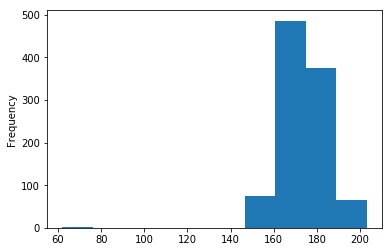

In [9]:
df2['Height'].plot(kind = 'hist')

In [10]:
#There is 1 row with an abnormally height but a normal looking weight.Let's fill it by looking at the weight by others in her range

weight = df2[(df2['Weight'] >54) & (df2['Weight'] < 56)]
df2.loc[df2['Height'] < 140, 'Height']=  weight['Height'].mean()


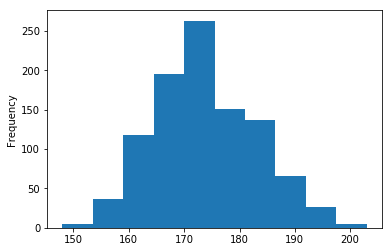

In [11]:
df2['Height'].plot(kind = 'hist')

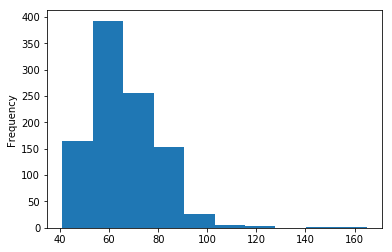

In [12]:
df2['Weight'].plot(kind = 'hist')

In [13]:
df2.loc[df2['Weight'] > 120]
#could be a mistake or maybe not so leaving as is.

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,168.0,165.0,0.0,0,1.0,2,1.0,1.0,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,1,1.0,2,0.0,1.0,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,1,1.0,4,0.0,1.0,block of flats


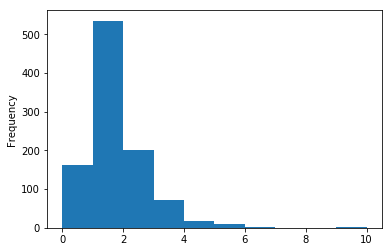

In [14]:
#checking for outliers in number of siblings
df['Number of siblings'].plot(kind = 'hist')


In [15]:
#checking for incorectly entered other columns
categ = (df2.loc[:, 'Music':'Spending on healthy eating'].astype(float))
                                                            

In [16]:
#Confirming that no data points have a rating greater than 5 or less than 1. 
categ[categ[(categ < 1) | (categ > 5)].any(1)]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
